DBSCAN STANDARD SCALING

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
# Load the cleaned dataset
data = pd.read_csv('cleaned_CKD_dataset.csv')

# Apply StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

print("Data scaled using StandardScaler.")


Data scaled using StandardScaler.


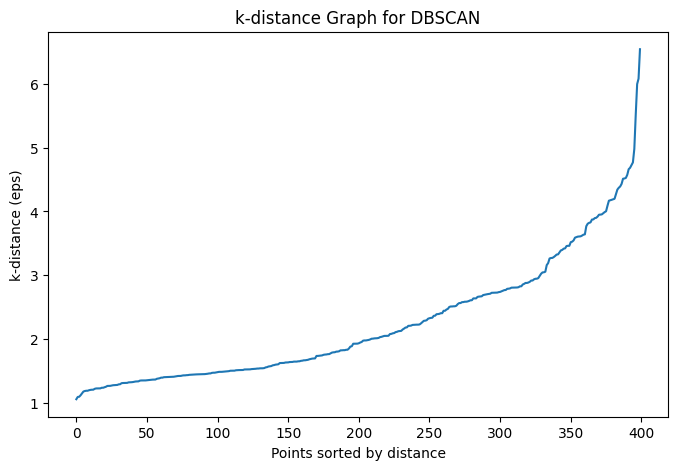

In [ ]:
# Compute k-distance graph (k = min_samples)
nearest_neighbors = NearestNeighbors(n_neighbors=5)  # min_samples = 5
nearest_neighbors.fit(data_scaled)
distances, indices = nearest_neighbors.kneighbors(data_scaled)

# Sort distances of the k-th nearest neighbor
distances = np.sort(distances[:, -1])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title("k-distance Graph for DBSCAN")
plt.xlabel("Points sorted by distance")
plt.ylabel("k-distance (eps)")
plt.show()

# From this plot, choose the elbow point as the `eps`


Number of clusters: 2
Number of noise points: 58
Silhouette Score: 0.1730


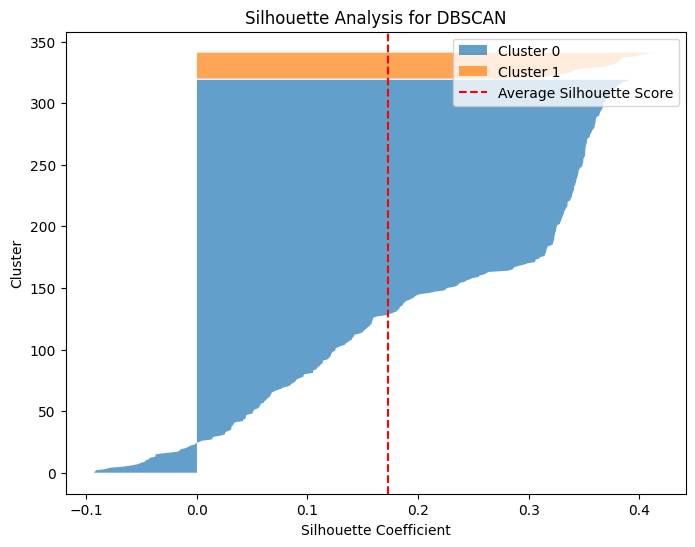

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Adjusted DBSCAN Parameters
dbscan = DBSCAN(eps=3.0, min_samples=8)  
clusters = dbscan.fit_predict(data_scaled)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Count clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Silhouette Score and Silhouette Graph
if n_clusters > 1:
    silhouette_avg = silhouette_score(data_scaled, clusters)
    print(f"Silhouette Score: {silhouette_avg:.4f}")

    # Calculate silhouette scores for each sample
    silhouette_vals = silhouette_samples(data_scaled, clusters)

    # Silhouette plot
    plt.figure(figsize=(8, 6))
    y_lower, y_upper = 0, 0
    for i in range(n_clusters):  # Loop through each cluster
        cluster_silhouette_vals = silhouette_vals[clusters == i]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_silhouette_vals, alpha=0.7, label=f'Cluster {i}')
        y_lower += len(cluster_silhouette_vals)

    # Add a vertical line for average silhouette score
    plt.axvline(silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.title("Silhouette Analysis for DBSCAN")
    plt.legend()
    plt.show()
else:
    print("Silhouette Score cannot be computed with fewer than 2 clusters.")


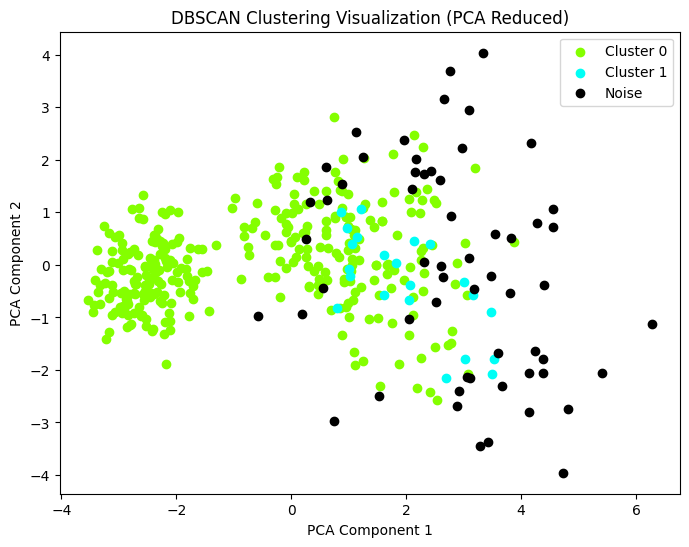

In [41]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot clusters using PCA-reduced data
plt.figure(figsize=(8, 6))
unique_clusters = set(clusters)
colors = sns.color_palette('hsv', len(unique_clusters))

for cluster, color in zip(unique_clusters, colors):
    if cluster == -1:
        plt.scatter(data_pca[clusters == cluster, 0], data_pca[clusters == cluster, 1], 
                    c='black', label='Noise')
    else:
        plt.scatter(data_pca[clusters == cluster, 0], data_pca[clusters == cluster, 1], 
                    color=color, label=f'Cluster {cluster}')

plt.title("DBSCAN Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


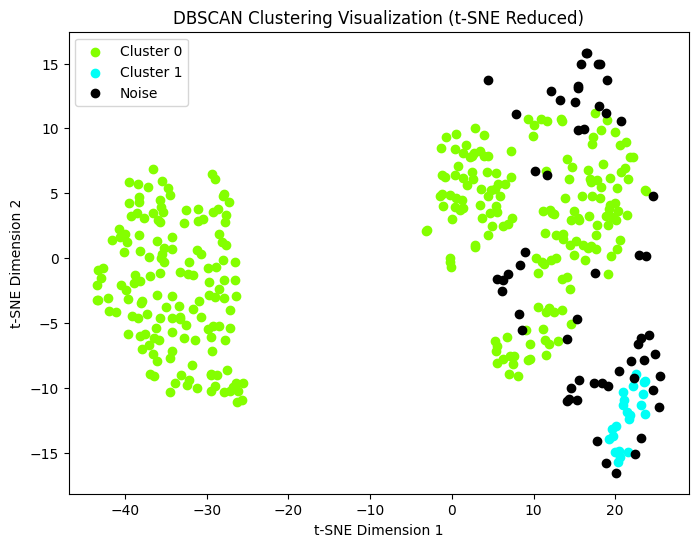

In [42]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# Plot clusters using t-SNE-reduced data
plt.figure(figsize=(8, 6))
unique_clusters = set(clusters)
colors = sns.color_palette('hsv', len(unique_clusters))

for cluster, color in zip(unique_clusters, colors):
    if cluster == -1:
        plt.scatter(data_tsne[clusters == cluster, 0], data_tsne[clusters == cluster, 1], 
                    c='black', label='Noise')
    else:
        plt.scatter(data_tsne[clusters == cluster, 0], data_tsne[clusters == cluster, 1], 
                    color=color, label=f'Cluster {cluster}')

plt.title("DBSCAN Clustering Visualization (t-SNE Reduced)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()


DBSCAN minmax scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMax Scaling
scaler = MinMaxScaler()
data_minmax = scaler.fit_transform(data)

print("Data scaled using MinMaxScaler.")


Data scaled using MinMaxScaler.


In [ ]:
# Adjust DBSCAN parameters for MinMax-scaled data
dbscan = DBSCAN(eps=0.3, min_samples=8)  
clusters = dbscan.fit_predict(data_minmax)

# Count clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Silhouette Score
if n_clusters > 1:
    silhouette_avg = silhouette_score(data_minmax, clusters)
    print(f"Silhouette Score (MinMax Scaled Data): {silhouette_avg:.4f}")
else:
    print("Silhouette Score cannot be computed with fewer than 2 clusters.")


Number of clusters: 5
Number of noise points: 207
Silhouette Score (MinMax Scaled Data): 0.0861


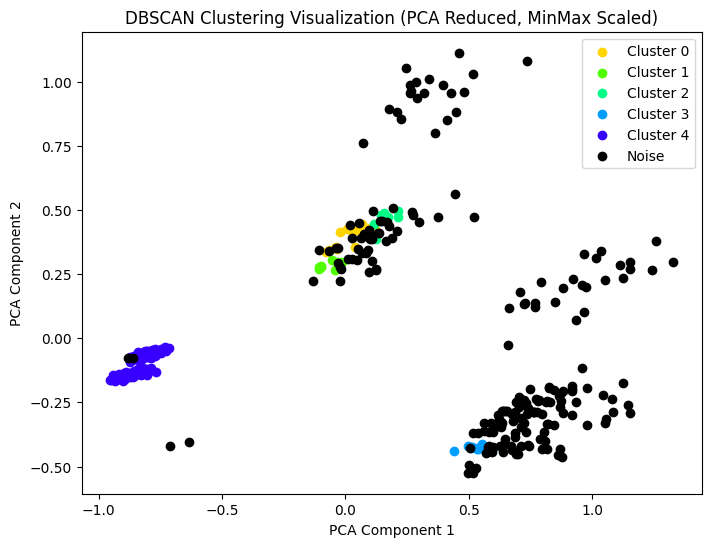

In [46]:
# PCA for MinMax-scaled data
pca = PCA(n_components=2)
data_pca_minmax = pca.fit_transform(data_minmax)

# Plot clusters using PCA-reduced data
plt.figure(figsize=(8, 6))
unique_clusters = set(clusters)
colors = sns.color_palette('hsv', len(unique_clusters))

for cluster, color in zip(unique_clusters, colors):
    if cluster == -1:
        plt.scatter(data_pca_minmax[clusters == cluster, 0], data_pca_minmax[clusters == cluster, 1], 
                    c='black', label='Noise')
    else:
        plt.scatter(data_pca_minmax[clusters == cluster, 0], data_pca_minmax[clusters == cluster, 1], 
                    color=color, label=f'Cluster {cluster}')

plt.title("DBSCAN Clustering Visualization (PCA Reduced, MinMax Scaled)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


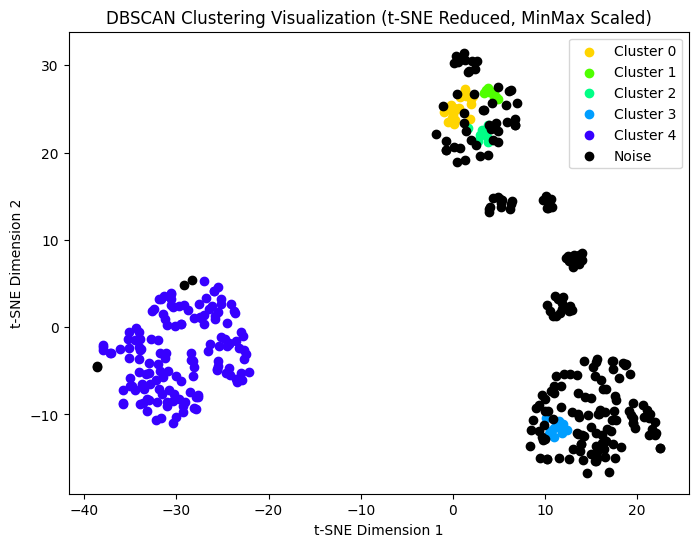

In [47]:
# t-SNE for MinMax-scaled data
tsne = TSNE(n_components=2, random_state=42)
data_tsne_minmax = tsne.fit_transform(data_minmax)

# Plot clusters using t-SNE-reduced data
plt.figure(figsize=(8, 6))
unique_clusters = set(clusters)
colors = sns.color_palette('hsv', len(unique_clusters))

for cluster, color in zip(unique_clusters, colors):
    if cluster == -1:
        plt.scatter(data_tsne_minmax[clusters == cluster, 0], data_tsne_minmax[clusters == cluster, 1], 
                    c='black', label='Noise')
    else:
        plt.scatter(data_tsne_minmax[clusters == cluster, 0], data_tsne_minmax[clusters == cluster, 1], 
                    color=color, label=f'Cluster {cluster}')

plt.title("DBSCAN Clustering Visualization (t-SNE Reduced, MinMax Scaled)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()


In [48]:
# Test different combinations of `eps` and `min_samples`
for eps_val in [0.2, 0.3, 0.4]:
    for min_samples_val in [5, 8, 10]:
        dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
        clusters = dbscan.fit_predict(data_minmax)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise = list(clusters).count(-1)

        if n_clusters > 1:
            silhouette_avg = silhouette_score(data_minmax, clusters)
            print(f"eps: {eps_val}, min_samples: {min_samples_val} -> Clusters: {n_clusters}, Noise: {n_noise}, Silhouette Score: {silhouette_avg:.4f}")
        else:
            print(f"eps: {eps_val}, min_samples: {min_samples_val} -> Clusters: {n_clusters}, Noise: {n_noise}, Silhouette Score: Not Applicable")


eps: 0.2, min_samples: 5 -> Clusters: 5, Noise: 356, Silhouette Score: -0.3085
eps: 0.2, min_samples: 8 -> Clusters: 1, Noise: 391, Silhouette Score: Not Applicable
eps: 0.2, min_samples: 10 -> Clusters: 0, Noise: 400, Silhouette Score: Not Applicable
eps: 0.3, min_samples: 5 -> Clusters: 4, Noise: 199, Silhouette Score: 0.1155
eps: 0.3, min_samples: 8 -> Clusters: 5, Noise: 207, Silhouette Score: 0.0861
eps: 0.3, min_samples: 10 -> Clusters: 3, Noise: 232, Silhouette Score: 0.0743
eps: 0.4, min_samples: 5 -> Clusters: 6, Noise: 124, Silhouette Score: 0.2472
eps: 0.4, min_samples: 8 -> Clusters: 3, Noise: 146, Silhouette Score: 0.2800
eps: 0.4, min_samples: 10 -> Clusters: 3, Noise: 163, Silhouette Score: 0.2485


In [49]:
for eps_val in [0.05, 0.1, 0.15, 0.2]:
    for min_samples_val in [5, 8, 10]:
        dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
        clusters = dbscan.fit_predict(data_minmax)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise = list(clusters).count(-1)

        if n_clusters > 1:
            silhouette_avg = silhouette_score(data_minmax, clusters)
            print(f"eps: {eps_val}, min_samples: {min_samples_val} -> Clusters: {n_clusters}, Noise: {n_noise}, Silhouette Score: {silhouette_avg:.4f}")
        else:
            print(f"eps: {eps_val}, min_samples: {min_samples_val} -> Clusters: {n_clusters}, Noise: {n_noise}, Silhouette Score: Not Applicable")


eps: 0.05, min_samples: 5 -> Clusters: 0, Noise: 400, Silhouette Score: Not Applicable
eps: 0.05, min_samples: 8 -> Clusters: 0, Noise: 400, Silhouette Score: Not Applicable
eps: 0.05, min_samples: 10 -> Clusters: 0, Noise: 400, Silhouette Score: Not Applicable
eps: 0.1, min_samples: 5 -> Clusters: 0, Noise: 400, Silhouette Score: Not Applicable
eps: 0.1, min_samples: 8 -> Clusters: 0, Noise: 400, Silhouette Score: Not Applicable
eps: 0.1, min_samples: 10 -> Clusters: 0, Noise: 400, Silhouette Score: Not Applicable
eps: 0.15, min_samples: 5 -> Clusters: 0, Noise: 400, Silhouette Score: Not Applicable
eps: 0.15, min_samples: 8 -> Clusters: 0, Noise: 400, Silhouette Score: Not Applicable
eps: 0.15, min_samples: 10 -> Clusters: 0, Noise: 400, Silhouette Score: Not Applicable
eps: 0.2, min_samples: 5 -> Clusters: 5, Noise: 356, Silhouette Score: -0.3085
eps: 0.2, min_samples: 8 -> Clusters: 1, Noise: 391, Silhouette Score: Not Applicable
eps: 0.2, min_samples: 10 -> Clusters: 0, Noise: 400

In [50]:
# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
data_pca_highdim = pca.fit_transform(data_minmax)

# Apply DBSCAN on high-dimensional PCA data
dbscan = DBSCAN(eps=0.2, min_samples=8)
clusters_highdim = dbscan.fit_predict(data_pca_highdim)

# Evaluate clustering
n_clusters = len(set(clusters_highdim)) - (1 if -1 in clusters_highdim else 0)
n_noise = list(clusters_highdim).count(-1)
if n_clusters > 1:
    silhouette_avg = silhouette_score(data_pca_highdim, clusters_highdim)
    print(f"High-dimensional PCA -> Clusters: {n_clusters}, Noise: {n_noise}, Silhouette Score: {silhouette_avg:.4f}")
else:
    print(f"High-dimensional PCA -> Clusters: {n_clusters}, Noise: {n_noise}, Silhouette Score: Not Applicable")


High-dimensional PCA -> Clusters: 2, Noise: 255, Silhouette Score: 0.2035


GAUSSIAN MINMAX

In [53]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [54]:
# Load the cleaned dataset
data = pd.read_csv('cleaned_CKD_dataset.csv')

# Apply MinMax Scaling
scaler = MinMaxScaler()
data_minmax = scaler.fit_transform(data)

print("Data scaled using MinMaxScaler.")


Data scaled using MinMaxScaler.


In [ ]:

for n_components in range(2, 6):  # Testing 2 to 5 clusters
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm_clusters = gmm.fit_predict(data_minmax)
    
    # Silhouette Score
    silhouette_avg = silhouette_score(data_minmax, gmm_clusters)
    print(f"GMM with {n_components} components -> Silhouette Score: {silhouette_avg:.4f}")


GMM with 2 components -> Silhouette Score: 0.4265
GMM with 3 components -> Silhouette Score: 0.3907
GMM with 4 components -> Silhouette Score: 0.4552
GMM with 5 components -> Silhouette Score: 0.4118


In [ ]:
# Fit GMM with the optimal number of clusters
optimal_n = 4  
gmm = GaussianMixture(n_components=optimal_n, random_state=42)
gmm_clusters = gmm.fit_predict(data_minmax)

# Add cluster labels to the dataset
data['Cluster'] = gmm_clusters


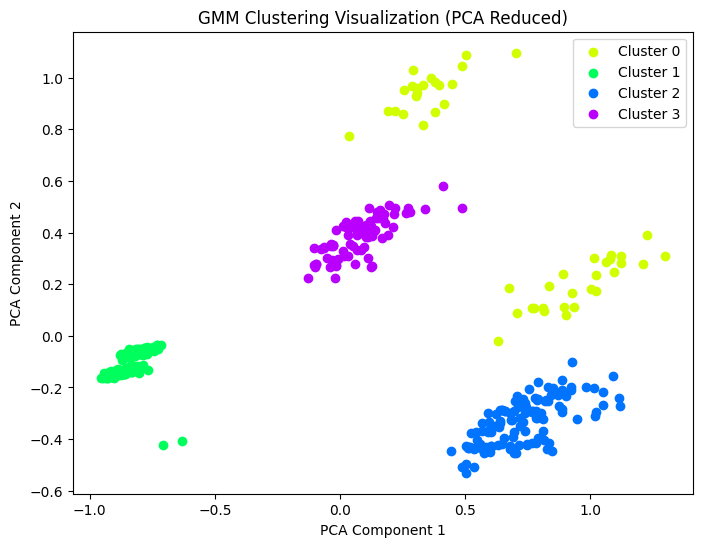

In [57]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_minmax)

# Plot clusters using PCA-reduced data
plt.figure(figsize=(8, 6))
unique_clusters = set(gmm_clusters)
colors = sns.color_palette('hsv', len(unique_clusters))

for cluster, color in zip(unique_clusters, colors):
    plt.scatter(data_pca[gmm_clusters == cluster, 0], data_pca[gmm_clusters == cluster, 1],
                label=f'Cluster {cluster}', color=color)

plt.title("GMM Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


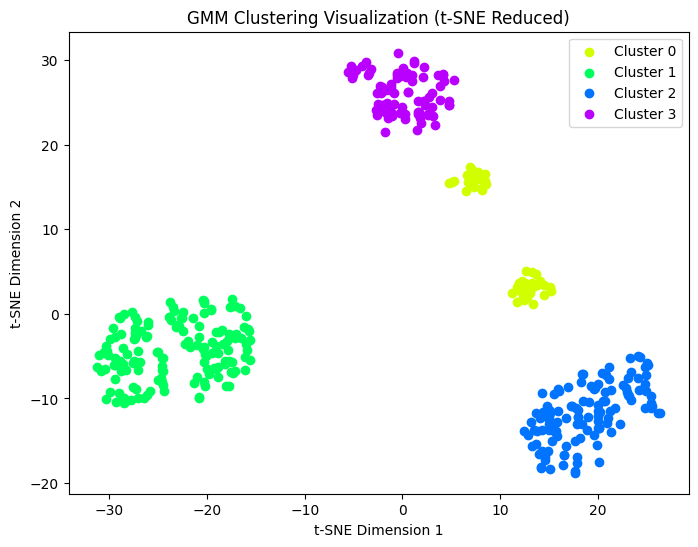

In [58]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_minmax)

# Plot clusters using t-SNE-reduced data
plt.figure(figsize=(8, 6))
for cluster, color in zip(unique_clusters, colors):
    plt.scatter(data_tsne[gmm_clusters == cluster, 0], data_tsne[gmm_clusters == cluster, 1],
                label=f'Cluster {cluster}', color=color)

plt.title("GMM Clustering Visualization (t-SNE Reduced)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()


In [59]:
silhouette_avg = silhouette_score(data_minmax, gmm_clusters)
print(f"Silhouette Score for GMM with {optimal_n} components: {silhouette_avg:.4f}")


Silhouette Score for GMM with 4 components: 0.4552


In [60]:
# Count the number of points in each cluster
cluster_counts = pd.Series(gmm_clusters).value_counts()
print("Cluster Distribution:")
print(cluster_counts)


Cluster Distribution:
1    150
2    121
3     82
0     47
Name: count, dtype: int64


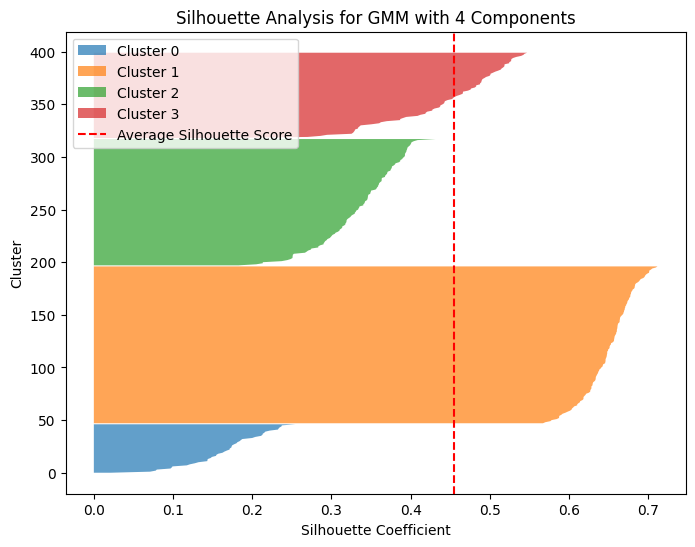

In [ ]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(data_minmax, gmm_clusters)

# Plot silhouette graph
plt.figure(figsize=(8, 6))
y_lower, y_upper = 0, 0
for i in range(optimal_n):  # Loop through each cluster
    cluster_silhouette_vals = silhouette_vals[gmm_clusters == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals, alpha=0.7, label=f'Cluster {i}')
    y_lower += len(cluster_silhouette_vals)


silhouette_avg = silhouette_score(data_minmax, gmm_clusters)
plt.axvline(silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")

# Label the plot
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title(f"Silhouette Analysis for GMM with {optimal_n} Components")
plt.legend()
plt.show()
#gpt prompt: add a vertical line for average silhouette score and clot silhouette graph and calculate silhouette scores for each sample

GAUSSIAN STANDARD

In [62]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [63]:
# Load the cleaned dataset
data = pd.read_csv('cleaned_CKD_dataset.csv')

# Apply StandardScaler
scaler = StandardScaler()
data_standard = scaler.fit_transform(data)

print("Data scaled using StandardScaler.")


Data scaled using StandardScaler.


In [64]:
# Test GMM with different numbers of clusters
for n_components in range(2, 6):  # Testing 2 to 5 clusters
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm_clusters = gmm.fit_predict(data_standard)
    
    # Silhouette Score
    silhouette_avg = silhouette_score(data_standard, gmm_clusters)
    print(f"GMM with {n_components} components -> Silhouette Score: {silhouette_avg:.4f}")


GMM with 2 components -> Silhouette Score: 0.2546
GMM with 3 components -> Silhouette Score: 0.2529
GMM with 4 components -> Silhouette Score: 0.2502
GMM with 5 components -> Silhouette Score: 0.1015


In [ ]:
# Fit GMM with the optimal number of clusters
optimal_n = 3  
gmm = GaussianMixture(n_components=optimal_n, random_state=42)
gmm_clusters = gmm.fit_predict(data_standard)

# Add cluster labels to the dataset
data['Cluster'] = gmm_clusters


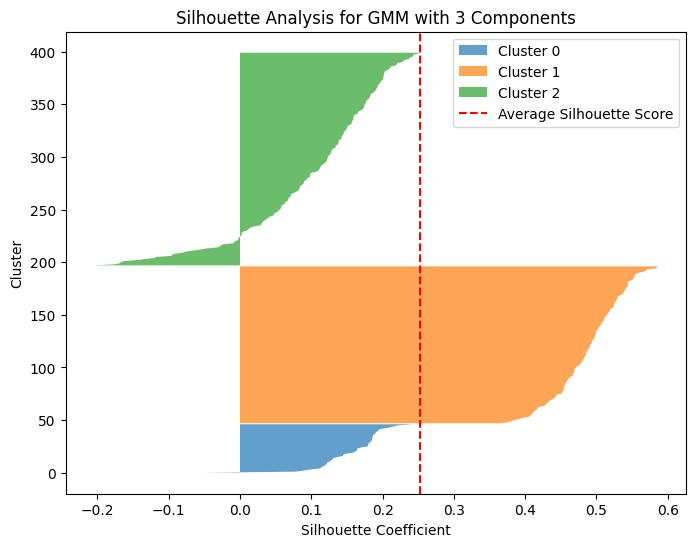

In [66]:
# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(data_standard, gmm_clusters)

# Plot silhouette graph
plt.figure(figsize=(8, 6))
y_lower, y_upper = 0, 0
for i in range(optimal_n):  # Loop through each cluster
    cluster_silhouette_vals = silhouette_vals[gmm_clusters == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals, alpha=0.7, label=f'Cluster {i}')
    y_lower += len(cluster_silhouette_vals)

# Add a vertical line for average silhouette score
silhouette_avg = silhouette_score(data_standard, gmm_clusters)
plt.axvline(silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")

# Label the plot
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title(f"Silhouette Analysis for GMM with {optimal_n} Components")
plt.legend()
plt.show()


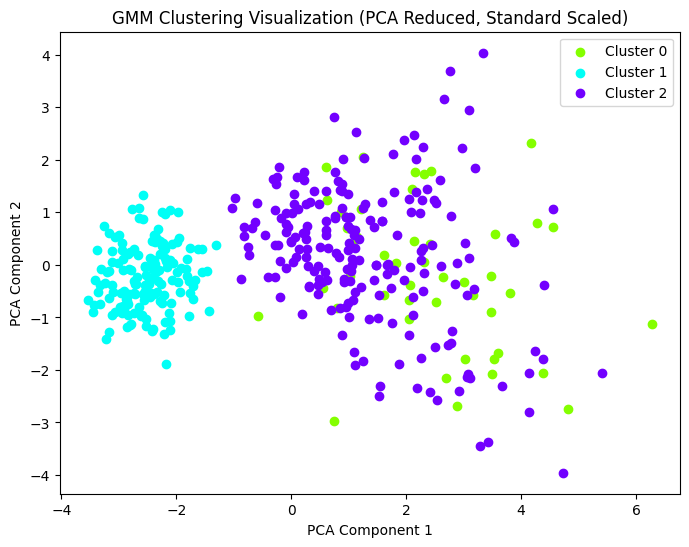

In [67]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standard)

# Plot clusters using PCA-reduced data
plt.figure(figsize=(8, 6))
unique_clusters = set(gmm_clusters)
colors = sns.color_palette('hsv', len(unique_clusters))

for cluster, color in zip(unique_clusters, colors):
    plt.scatter(data_pca[gmm_clusters == cluster, 0], data_pca[gmm_clusters == cluster, 1],
                label=f'Cluster {cluster}', color=color)

plt.title("GMM Clustering Visualization (PCA Reduced, Standard Scaled)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


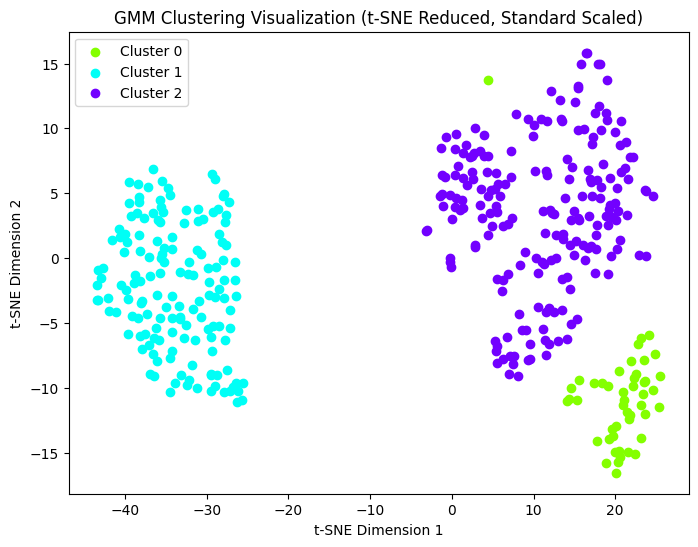

In [68]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_standard)

# Plot clusters using t-SNE-reduced data
plt.figure(figsize=(8, 6))
for cluster, color in zip(unique_clusters, colors):
    plt.scatter(data_tsne[gmm_clusters == cluster, 0], data_tsne[gmm_clusters == cluster, 1],
                label=f'Cluster {cluster}', color=color)

plt.title("GMM Clustering Visualization (t-SNE Reduced, Standard Scaled)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()


HEIRARCHIAL CLUSTERING

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [70]:
# Load the cleaned dataset
data = pd.read_csv('cleaned_CKD_dataset.csv')

# Apply MinMax Scaling
scaler = MinMaxScaler()
data_minmax = scaler.fit_transform(data)

print("Data scaled using MinMaxScaler.")


Data scaled using MinMaxScaler.


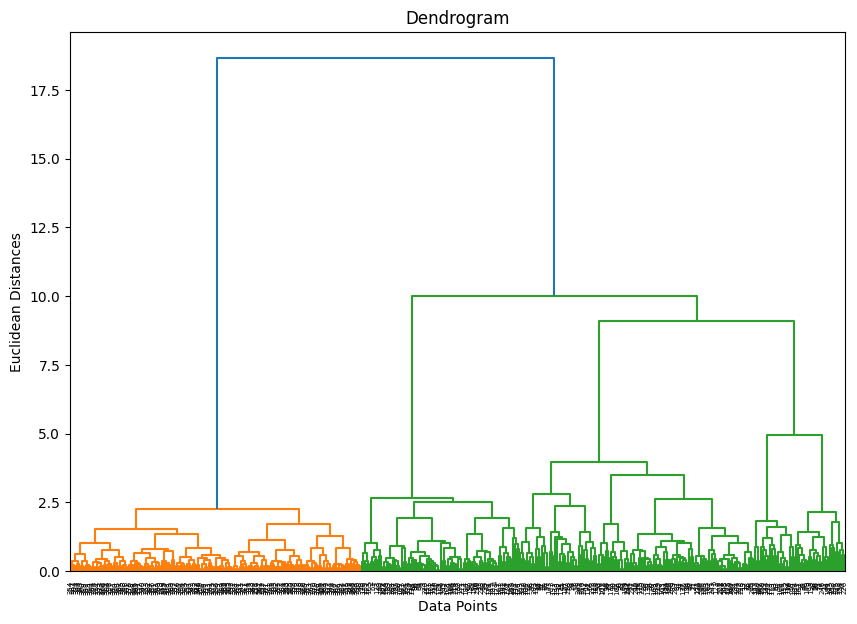

In [71]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_minmax, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distances")
plt.show()


In [72]:
# Apply Agglomerative Clustering
n_clusters = 3  # Based on the dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(data_minmax)

# Add cluster labels to the dataset
data['Cluster'] = hc_clusters

# Print cluster distribution
cluster_counts = pd.Series(hc_clusters).value_counts()
print("Cluster Distribution:")
print(cluster_counts)


Cluster Distribution:
0    168
1    150
2     82
Name: count, dtype: int64


c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [73]:
# Compute silhouette score
silhouette_avg = silhouette_score(data_minmax, hc_clusters)
print(f"Silhouette Score for Hierarchical Clustering with {n_clusters} Clusters: {silhouette_avg:.4f}")


Silhouette Score for Hierarchical Clustering with 3 Clusters: 0.4038


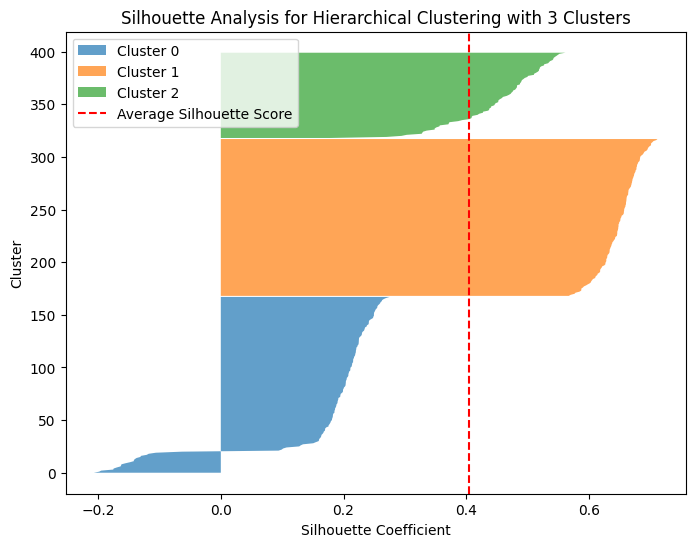

In [74]:
# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(data_minmax, hc_clusters)

# Plot silhouette graph
plt.figure(figsize=(8, 6))
y_lower, y_upper = 0, 0
for i in range(n_clusters):  # Loop through each cluster
    cluster_silhouette_vals = silhouette_vals[hc_clusters == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals, alpha=0.7, label=f'Cluster {i}')
    y_lower += len(cluster_silhouette_vals)

# Add a vertical line for average silhouette score
plt.axvline(silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")

# Label the plot
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title(f"Silhouette Analysis for Hierarchical Clustering with {n_clusters} Clusters")
plt.legend()
plt.show()


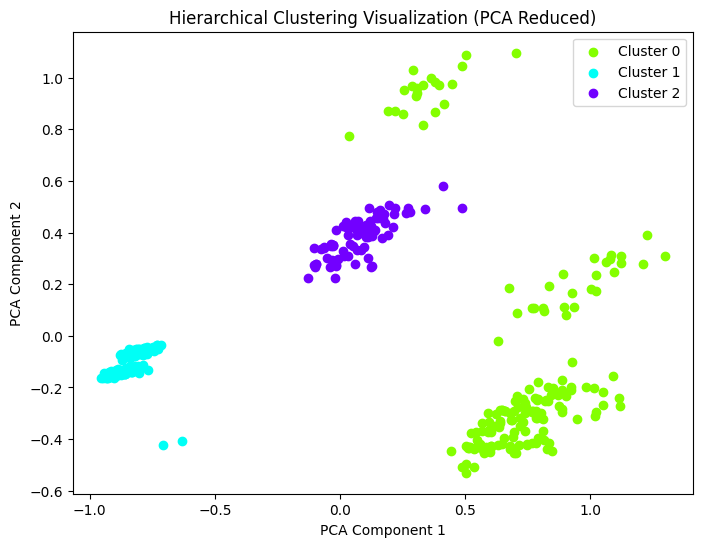

In [75]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_minmax)

# Plot clusters using PCA-reduced data
plt.figure(figsize=(8, 6))
unique_clusters = set(hc_clusters)
colors = sns.color_palette('hsv', len(unique_clusters))

for cluster, color in zip(unique_clusters, colors):
    plt.scatter(data_pca[hc_clusters == cluster, 0], data_pca[hc_clusters == cluster, 1],
                label=f'Cluster {cluster}', color=color)

plt.title("Hierarchical Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


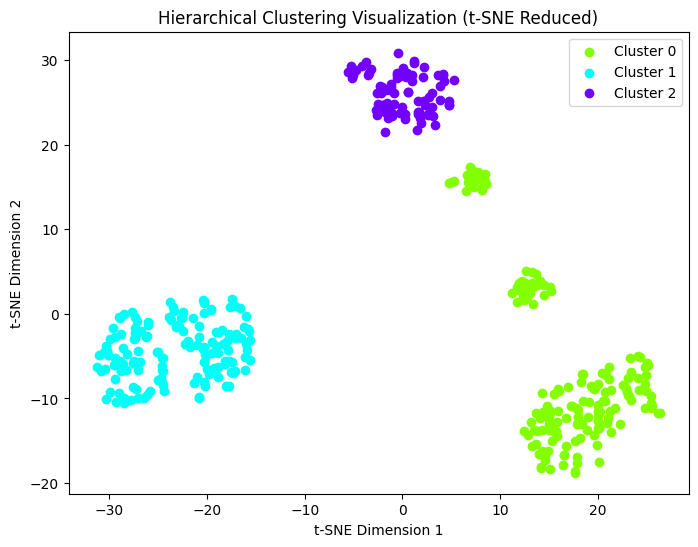

In [76]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_minmax)

# Plot clusters using t-SNE-reduced data
plt.figure(figsize=(8, 6))
for cluster, color in zip(unique_clusters, colors):
    plt.scatter(data_tsne[hc_clusters == cluster, 0], data_tsne[hc_clusters == cluster, 1],
                label=f'Cluster {cluster}', color=color)

plt.title("Hierarchical Clustering Visualization (t-SNE Reduced)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()


In [77]:
# Apply Agglomerative Clustering with more clusters
n_clusters = 4  # Start with 4 clusters
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(data_minmax)

# Add cluster labels and re-evaluate
data['Cluster'] = hc_clusters
silhouette_avg = silhouette_score(data_minmax, hc_clusters)
print(f"Silhouette Score with {n_clusters} Clusters: {silhouette_avg:.4f}")


Silhouette Score with 4 Clusters: 0.4552


c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


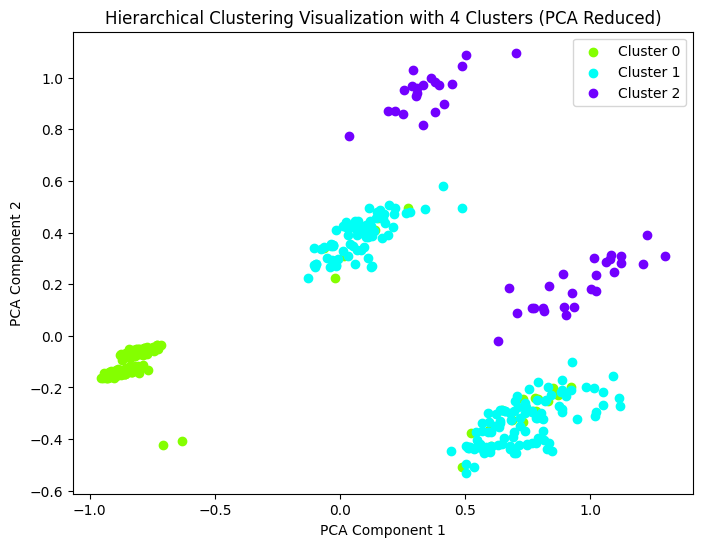

In [79]:
# PCA Visualization for 4 clusters
plt.figure(figsize=(8, 6))
unique_clusters = set(hc_clusters)
colors = sns.color_palette('hsv', len(unique_clusters))

for cluster, color in zip(unique_clusters, colors):
    plt.scatter(data_pca[hc_clusters == cluster, 0], data_pca[hc_clusters == cluster, 1],
                label=f'Cluster {cluster}', color=color)

plt.title("Hierarchical Clustering Visualization with 4 Clusters (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


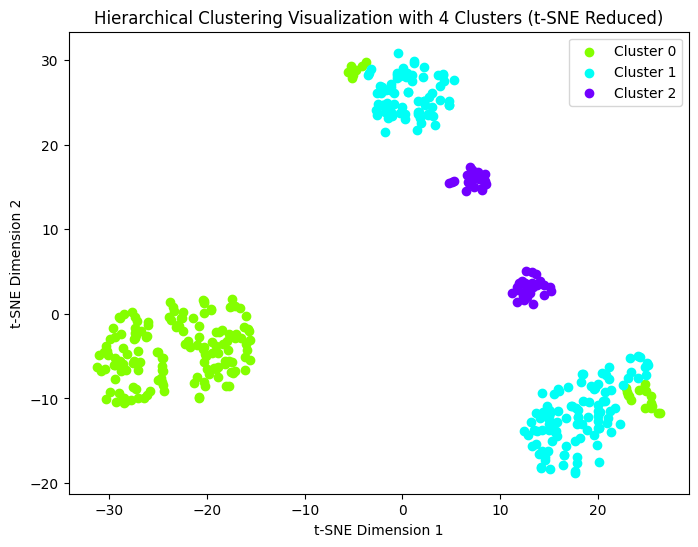

In [80]:
# t-SNE Visualization for 4 clusters
plt.figure(figsize=(8, 6))
for cluster, color in zip(unique_clusters, colors):
    plt.scatter(data_tsne[hc_clusters == cluster, 0], data_tsne[hc_clusters == cluster, 1],
                label=f'Cluster {cluster}', color=color)

plt.title("Hierarchical Clustering Visualization with 4 Clusters (t-SNE Reduced)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()


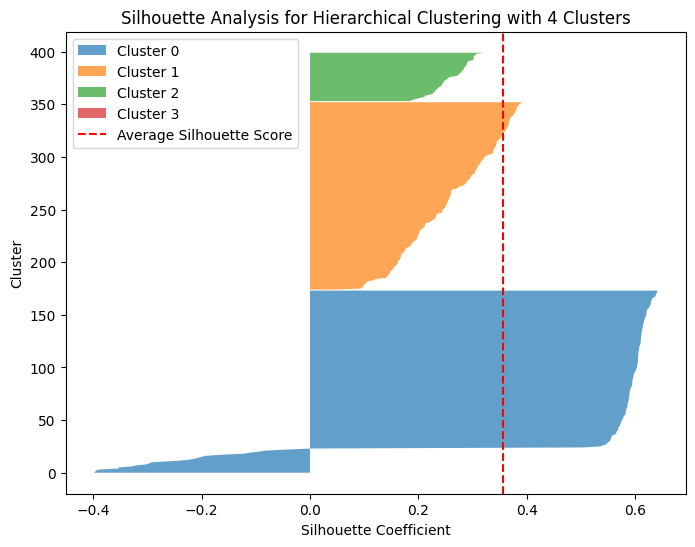

In [81]:
# Silhouette Graph for 4 clusters
silhouette_vals = silhouette_samples(data_minmax, hc_clusters)

plt.figure(figsize=(8, 6))
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[hc_clusters == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals, alpha=0.7, label=f'Cluster {i}')
    y_lower += len(cluster_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title(f"Silhouette Analysis for Hierarchical Clustering with 4 Clusters")
plt.legend()
plt.show()
